In [1]:
#导入库并产生数据
import math
import numpy as np
import torch
from torch.utils import data
import random



#制造数据集 y=Xw+b+噪声
def synthetic_data(w, b, num_examples): 
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

#"""构造⼀个PyTorch数据迭代器"""
def load_array(data_arrays, batch_size, is_train=True): 
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)


In [2]:
true_w, true_b = torch.ones((200, 1)) * 0.01, 0.05
train_data = synthetic_data(true_w, true_b, 20)
train_iter = load_array(train_data, 5)
test_data = synthetic_data(true_w, true_b, 100)
test_iter = load_array(test_data, 5, is_train=False)

In [3]:
from torch import nn
net=nn.Sequential(nn.Linear(200,1))
num_epoch=100
def set_sgd(wd):
    sgd=torch.optim.SGD([{"params":net[0].weight,'weight_decay': wd},
{"params":net[0].bias}], lr=0.00001)
    return sgd

在pytorch神经网络中已经为我们设置好了超参数，我们可通过改变超参数调整惩罚系数

In [4]:
'''
现在要定义一个函数，要求：
   1.运行完整的神经网络并含惩罚项
   2.惩罚系数自定
   3.获得每次迭代后的损失
   4.画图 
   5.每次循环运行测试集
'''
import matplotlib.pyplot as plt
def train_test(wd,num_epoch,net,train_data,train_iter,test_data):
    net[0].weight.data.normal_(0, 0.01)
    net[0].bias.data.fill_(0)
    loss=nn.MSELoss()
    sgd=set_sgd(wd)
    features,labels=train_data
    err_train=[]
    err_test=[]
    X_test,y_test=test_data
    for epoch in range(num_epoch):
        for X,y in train_iter:
            l=loss(net(X),y)
            sgd.zero_grad()
            l.backward()
            sgd.step()            
        l1=loss(net(features), labels).detach().numpy()
        l2=loss(net(X_test), y_test).detach().numpy()
        err_train.append(l1)
        err_test.append(l2)
    print(err_train[-1],err_test[-1])
    plt.plot(range(num_epoch),err_train,'o')
    plt.plot(range(num_epoch),err_test,'*')


C:\Users\11215\anaconda3\lib\site-packages\torch\autograd\__init__.py:173: UserWarning: CUDA initialization: CUDA driver initialization failed, you might not have a CUDA gpu. (Triggered internally at  C:\cb\pytorch_1000000000000\work\c10\cuda\CUDAFunctions.cpp:112.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


0.03815083 0.03511906


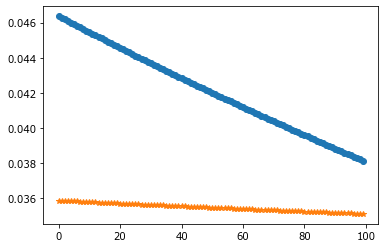

In [5]:
wd=0
train_test(wd,num_epoch,net,train_data,train_iter,test_data)

0.029418081 0.048387274


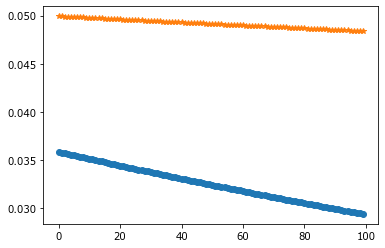

In [6]:
wd=4
train_test(wd,num_epoch,net,train_data,train_iter,test_data)